# Lab 2 - Pattern recognition with memristive networks

In this lab, we will work through an end-to-end example using a random network of memristors. Essentially this network is a bunch of $N$ randomly connected resistive switches that act like little mini neurons. We apply a current to a single element, and read the current from $M$ readout elements. The network acts as a complex dynamical system that nonlinearly transforms the input signals into a higher dimensional feature space so that they might be more linearly separable. We then perform regression on the readouts.

This example might closely follow a project that some of you might be working on, where you are running simulations, performing some machine learning, all the while collecting other data.

In [1]:
from reservoir import MemristorSim
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from seeds import set_all_seeds

set_all_seeds(0)

Connected network found


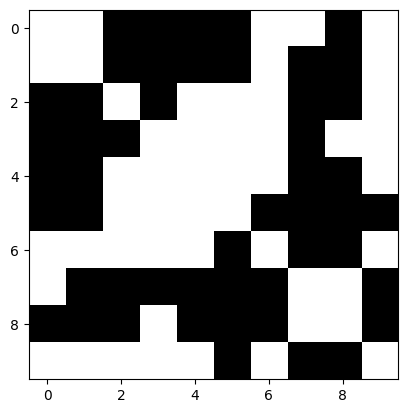

In [2]:
# Create random connectivity matrix with 10 nodes
def create_adjacency_matrix(shape=10):
    while True:
        try:
            W = np.random.randint(0,2, (shape,shape))
            W ^= W.T
            if nx.is_connected(nx.from_numpy_array(W)) == True:
                print("Connected network found")
                return W
        except:
            "Disconnected network, trying again..."


plt.imshow(W, 'Greys')
plt.show()

In [4]:
simParams = {
            'MU': 3.46e-5,
            'KAPPA': 0.038,
            'R_ON': 13e3,
            'R_OFF': 13e3 / 1e-2,
            'z_0': 0.05,
            'dist': 'normal',
            'var': 0,
            'NOISE': 0.0,
            'THETA': 10
        }

Vext = np.concatenate([np.ones((200,1)), 0.01*np.ones((200,1))])*0.1
Vext.shape

(400, 1)

In [5]:
sim3d = MemristorSim(W, simParams)
output = sim3d.applyVoltage(Vext,
                                                                        1,
                                                                        np.arange(0, len(Vext), 1),
                                                                        inputs=1,
                                                                        outputs=3,
                                                                        percolate=False)

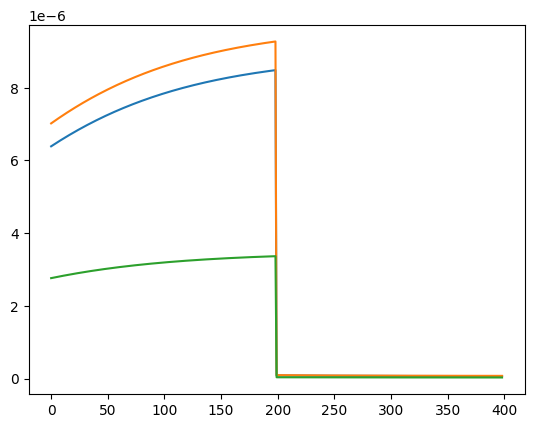

In [6]:
import matplotlib.pyplot as plt
plt.plot(output[0][1:,:])

In [45]:
states = memres.simulate(Vext)

	 ----- timestep = 100
	 ----- timestep = 200
	 ----- timestep = 300
	 ----- timestep = 400
	 ----- timestep = 500
	 ----- timestep = 600
	 ----- timestep = 700
	 ----- timestep = 800
	 ----- timestep = 900
	 ----- timestep = 1000
	 ----- timestep = 1100


In [40]:
states.shape

(1000, 100)

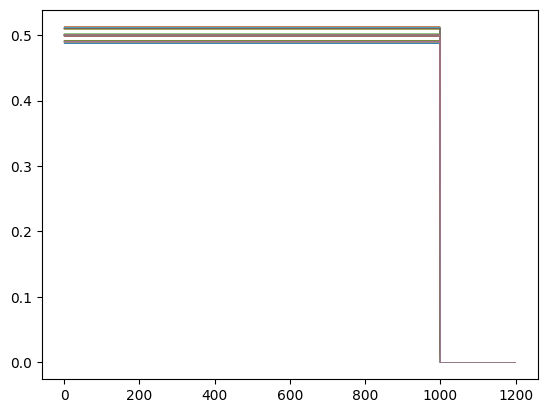

In [46]:
plt.plot(states[:,1:99], lw=0.5)